<a href="https://colab.research.google.com/github/Cathriel/wv72_tf_201711028_20181g907_201913412_201912712_201913425/blob/main/DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import numpy as np
import numpy.random as npr

n=npr.randint(2500,5000)
m = npr.randint(50,100)
nFilas=200
nColumnas=200
array1 = npr.randint(0, nFilas, (n, 2), dtype=np.int)
array2 = npr.randint(0,nColumnas, (m, 2), dtype=np.int)
print(n,m)

3991 83


In [137]:
def DeleteEqualsAndSort(array):
  indices = list()
  for i in range(len(array)):
    j=i
    while j < len(array)-1:
      j+=1
      if array[i][0]==array[j][0] and array[i][1]==array[j][1] and i != j:
        equals = True
        indices.append(j)
        break
  
  points = list()
  c = 0 
  for i in range(len(array)):
    if c < len(indices):
      if i == indices[c]:
        c+=1
      else:
        toAdd = (array[i][0],array[i][1])
        points.append(toAdd)
    else:
      toAdd = (array[i][0],array[i][1])
      points.append(toAdd)

  for i in range(len(points)):
    j=i
    while j < len(points)-1:
      j+=1
      if points[i][1]>points[j][1]:
        points[i],points[j]=points[j],points[i]
      elif points[i][1]==points[j][1]:
        if points[i][0]>points[j][0]:
          points[i],points[j]=points[j],points[i]

  return points

In [138]:
pointsAlmacenes = list()
pointsEntrega = list()
pointsEntrega=DeleteEqualsAndSort(array1)
pointsAlmacenes=DeleteEqualsAndSort(array2)

In [139]:
def DeleteEqualsInExtraPoints():
  i=0
  j=0
  k=0
  nodes = list()
  while i < len(extraPoints):
    addSomething = False
    toAdd=list()
    number = extraPoints[i][0]+extraPoints[i][1]*nFilas
    toAdd.append(number)

    #Nodo de Abajo
    if number-nFilas>=0:
      toAdd.append(number-nFilas)

    #Nodo de la Izquierda
    if number-1>= (extraPoints[i][1]*nFilas):
      toAdd.append(number-1)

    #Nodo de la Derecha
    if number+1<((extraPoints[i][1]+1)*nFilas):
      toAdd.append(number+1)

    #Nodo de Arriba
    if number+nFilas<(nFilas*nColumnas):
      toAdd.append(number+nFilas)

    while j < len(pointsEntrega):
      if extraPoints[i][0]==pointsEntrega[j][0] and extraPoints[i][1]==pointsEntrega[j][1]:
        extraPoints.pop(i)
        i-=1
        j+=1
        toAdd.append(1)
        addSomething = True   
        break
      else:
        break
    while k < len(pointsAlmacenes):
      if extraPoints[i][0]==pointsAlmacenes[k][0] and extraPoints[i][1]==pointsAlmacenes[k][1]:
        extraPoints.pop(i)
        i-=1
        k+=1
        toAdd.append(2)
        addSomething = True
        break
      else:
        break
    if addSomething == False:
      toAdd.append(0)
    i+=1
    nodes.append(toAdd)
  return nodes


In [140]:
extraPoints = list()
for i in range(nFilas):
  for j in range(nColumnas):
    toAdd = (j,i)
    extraPoints.append(toAdd)

In [141]:
nodos = list()
nodos = DeleteEqualsInExtraPoints()

In [142]:
np.savetxt('pointsEntrega.csv', pointsEntrega, fmt="%i", delimiter=",", header="x,y", comments="")
np.savetxt('pointsAlmacenes.csv', pointsAlmacenes, fmt="%i", delimiter=",", header="x,y", comments="")

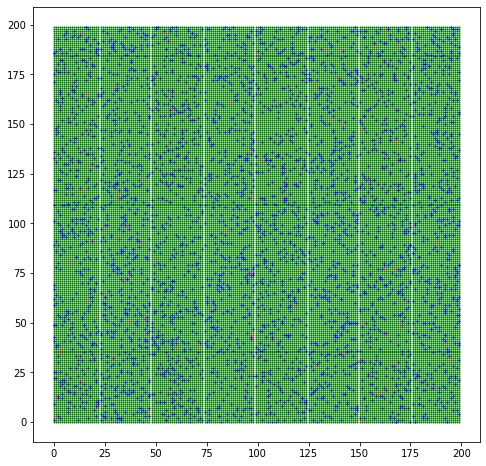

In [143]:
import matplotlib.pyplot as plt

x = list()
x2 = list()
x3 = list()
y = list()
y2 = list()
y3 = list()
fig, ax = plt.subplots(figsize=(8,8))
#plt.figure(figsize=(1,1))
for i in range(len(pointsEntrega)):
  x.append(pointsEntrega[i][0])
  y.append(pointsEntrega[i][1])
  
for i in range(len(pointsAlmacenes)):
  x2.append(pointsAlmacenes[i][0])
  y2.append(pointsAlmacenes[i][1])
  
for i in range(len(extraPoints)):
  x3.append(extraPoints[i][0])
  y3.append(extraPoints[i][1])

ax.scatter(x3,y3,color='green',s=1)
ax.scatter(x,y,color='blue',s=1)
ax.scatter(x2,y2,color='red',s=1)
plt.show()